In [7]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import glob
from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file, plot_some
from csbdeep.io import save_tiff_imagej_compatible
from csbdeep.models import UpsamplingCARE

In [8]:
basedirGT = '/data/u934/service_imagerie/v_kapoor/PairTestData/GT/'
basedirLow = '/data/u934/service_imagerie/v_kapoor/PairTestData/Low/'
basedirResults = '/data/u934/service_imagerie/v_kapoor/PairTestData/resultsUpsampling/'

Filename =  /data/u934/service_imagerie/v_kapoor/PairTestData/Low/40x_bin1_05_5min_2_w2CSU-488_s1_t28.tif
Filename =  /data/u934/service_imagerie/v_kapoor/PairTestData/Low/40x_bin1_05_5min_2_w2CSU-488_s1_t27.tif
Filename =  /data/u934/service_imagerie/v_kapoor/PairTestData/Low/40x_bin1_05_5min_2_w2CSU-488_s1_t29.tif
total Low images =  3
total GT images =  3
image size = (26, 2048, 2048)
image axes = ZYX


KeyboardInterrupt: 

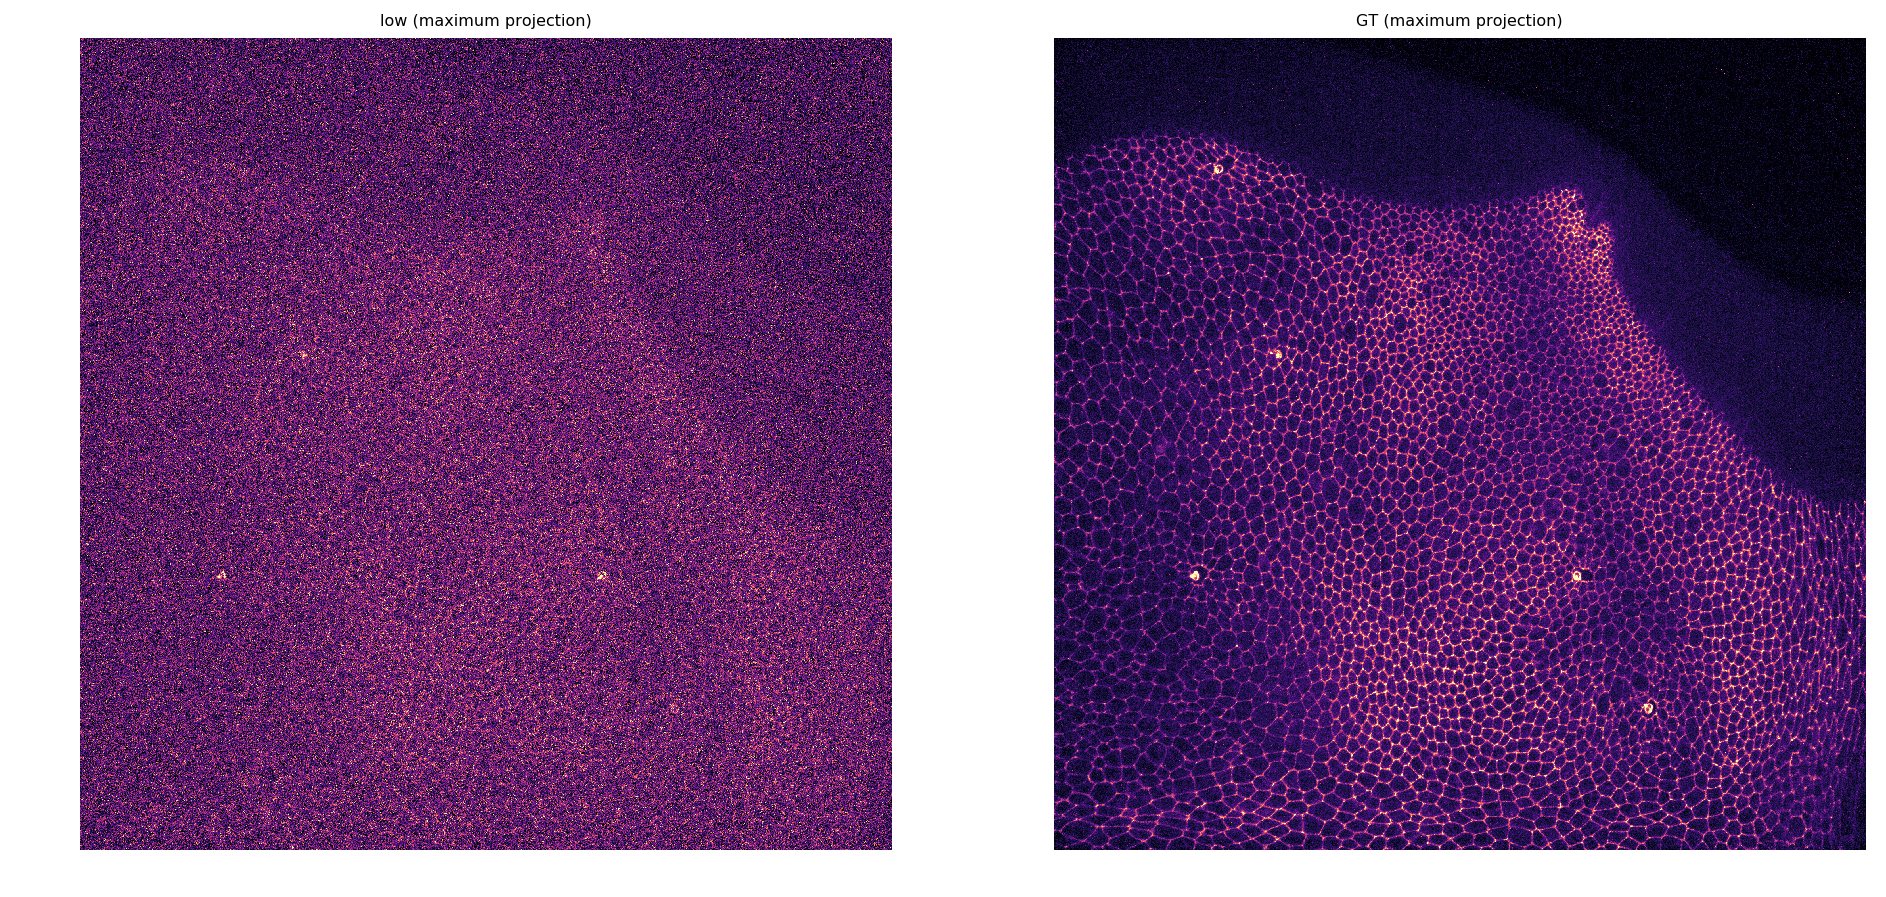

<Figure size 1152x720 with 0 Axes>

In [9]:
GT_path = os.path.join(basedirGT, '*tif')
GTfiles = []
Names = []
filesGT = glob.glob(GT_path)
for fname in filesGT:
      y = imread(fname)
    
      GTfiles.append(y)
Raw_path = os.path.join(basedirLow, '*tif')
Rawfiles = []
filesRaw = glob.glob(Raw_path)
for fname in filesRaw:
        x = imread(fname)
        Names.append(fname)
        print('Filename = ', fname)
        Rawfiles.append(x)
       
GTfiles.sort
Rawfiles.sort
Names.sort
axes = 'ZYX'
print('total Low images = ', len(Rawfiles))
print('total GT images = ', len(GTfiles))
print('image size =', x.shape)
print('image axes =', axes)
assert(len(Rawfiles) == len(GTfiles))
for i in range(0, len(Rawfiles)):
     plt.figure(figsize=(16,10))
      
     plot_some(np.stack([Rawfiles[i],GTfiles[i]]),
          title_list=[['low (maximum projection)','GT (maximum projection)']], 
          pmin=2,pmax=99.8);

In [ ]:
model = UpsamplingCARE(config=None, name='JesusCareCADGFPExcellentupsampling3D', basedir='models')

In [ ]:
%%time

Restoredfiles = []
for x in Rawfiles:
     restored = model.predict(x, axes)
     Restoredfiles.append(restored)
     print('input  size =', x.shape)
     print('output size =', restored.shape)
     print()

In [ ]:
Path(basedirResults).mkdir(exist_ok=True)
for i in range(0, len(Names)):
     print((basedirResults + '%s_' + os.path.basename(Names[i]) ))
     save_tiff_imagej_compatible((basedirResults + '%s_' + os.path.basename(Names[i]) ) % model.name, Restoredfiles[i], axes)

In [ ]:
for i in range(0, len(Restoredfiles)):
      plt.figure(figsize=(16,10))
      plot_some(np.stack([Restoredfiles[i]]),
          title_list=[['CARE (maximum projection)']], 
          pmin=2,pmax=99.8);
      print('Filename = ', Names[i])